# Adaptive Modulation Project: Automatic Modulation Recognition Training
## Prepared by: Mohammedali Khalaf

This Jupyter Notebook contains the work in order to create an automatic modulation recognition model. The reason that thsi is being done is to faclitate the completion of the ECED 4676 Adaptive Modulation Project (2023).

This model will differentiate between three modulation schemes
- BFSK
- 4FSK
- 8FSK
These modulation schemes were the ones selected to be used in the adaptive modulation system and as such will be the ones considered in training this model.

With regards to the dataset, the dataset of choice for this project is HisarMod. This dataset is available on IEEE DataPort and its citation is given below.

Kürşat Tekbıyık, Cihat Keçeci, Ali Rıza Ekti, Ali Görçin, Güneş Karabulut Kurt, October 27, 2019, "HisarMod: A new challenging modulated signals dataset", IEEE Dataport, doi: https://dx.doi.org/10.21227/8k12-2g70.

Basic libraries are imported below.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from google.colab import drive
drive.mount('/content/drive') # Mounting the Drive

Mounted at /content/drive


The dataset is loaded in below amd pre-processed in order to have the correct foramt of data. The rows have been selected such that only samples from the selected modulation schemes are considered below.

In [ ]:
# Below is are the directories for the data file and label file
train_data_file = '/content/drive/MyDrive/Data/HisarMod/train_data.csv'

# The ranges below describe the desired data chunks from the data to be used for this assignment.
ranges = {
'8FSK': [
    (266001, 267000),
    (292001, 293000),
    (318001, 319000),
    (344001, 345000),
    (370001, 371000),
    (396001, 397000),
    (422001, 423000),
    (448001, 449000),
    (474001, 475000),
    (500001, 501000)
],
'4FSK': [
    (265001, 266000),
    (291001, 292000),
    (317001, 318000),
    (343001, 344000),
    (369001, 370000),
    (395001, 396000),
    (421001, 422000),
    (447001, 448000),
    (473001, 474000),
    (499001, 500000)
],
'2FSK': [
    (264001, 265000),
    (290001, 291000),
    (316001, 317000),
    (342001, 343000),
    (368001, 369000),
    (394001, 395000),
    (420001, 421000),
    (446001, 447000),
    (472001, 473000),
    (498001, 499000)
]
}

# Initialize empty dataframe
Raw_Data = pd.DataFrame()

# Load chunks into the desired DataFrame
for modulation, chunks in ranges.items():
  for start, end in chunks:
    chunk_dataframe = pd.read_csv(train_data_file, header=None, skiprows=start-1, nrows=end-start+1)
    print("Chunk Completed: " + modulation) # Provide a method to see the progress of the execution
    # Adding a column for labels
    chunk_dataframe['Label'] = modulation

    # Append to main dataframe
    Raw_Data = pd.concat([Raw_Data, chunk_dataframe], ignore_index=True)
    Raw_Data

# Print Dataframe to verify success
Raw_Data

Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 8FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 4FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK
Chunk Completed: 2FSK


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Label
0,0.53697-0.28806i,-0.3262+0.32641i,-2.4016-0.43478i,-0.35539-0.15567i,1.4879+1.5286i,-0.6073+0.39325i,-1.9358+1.7313i,-0.87073+0.12106i,0.049947-1.6577i,0.19431-1.2385i,...,0.13042-0.02177i,1.0119+1.1996i,-1.2677-0.26708i,-0.67058-0.40656i,0.84451-0.49675i,2.2362-0.43683i,-0.10538+0.19546i,0.14605+0.22877i,-0.49456+0.38547i,8FSK
1,0.055417+0.15264i,0.1561+0.97598i,0.049114-0.95853i,0.92991+0.60521i,0.34359+2.3861i,0.92958+1.7101i,1.9604+0.79855i,1.8156+0.031223i,0.6325+0.04669i,0.45706-0.024723i,...,-1.3124-1.1418i,-0.73761-0.61873i,-2.263-1.5425i,-0.56235-0.89102i,0.87087-1.8255i,2.0146+0.19972i,-0.039574+0.47376i,0.046646+1.3103i,-0.38886-0.19752i,8FSK
2,1.4191+1.2969i,0.15155-1.5196i,0.2462-0.88881i,-1.1651-1.42i,0.19687-0.13206i,-0.88958+1.0743i,-1.4539-0.10439i,-0.85769+1.3939i,-2.1428+2.3128i,-0.94004+1.1004i,...,-0.18535+0.27534i,-0.96726-0.8598i,0.45077-2.2901i,0.43422-0.94233i,0.31282+0.49047i,-1.2485+1.7993i,0.67601+2.4222i,1.1318+1.5803i,0.21078+0.4523i,8FSK
3,1.3526-1.0935i,1.0612+1.1404i,-0.14651-0.34186i,-0.70573+0.50013i,0.51249-1.9196i,-0.52079-1.3458i,-0.55435+0.45523i,-1.9716+2.0866i,-1.2322+1.3945i,-0.71727-0.38801i,...,1.3245-0.72563i,0.63185-0.83942i,-2.1069-0.52832i,-1.7535+0.87093i,-0.098609+0.98528i,0.74844-0.040522i,0.30302-0.056232i,-2.2463-1.2814i,-1.4844-0.076726i,8FSK
4,-0.17598+0.18052i,0.33492+0.51475i,-1.5695+0.81256i,-1.3592-0.082676i,0.86658-0.66698i,0.2706-0.15256i,0.21913+0.2404i,0.17854-0.019638i,0.46589-1.7213i,-0.84087-0.8637i,...,0.43045+1.5482i,-0.70271-0.08029i,0.29717-0.3142i,2.7407-0.52155i,0.06869+0.18179i,-0.95629+0.68638i,-1.2889-0.12448i,-0.060709-0.74103i,1.1068-0.014435i,8FSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.11643-0.09932i,0.39744+0.41392i,0.57947+0.65804i,-0.74497-0.75582i,-0.71064-0.86499i,0.87871+0.69274i,0.65297+0.86204i,-0.71506-0.79721i,-0.54753-0.70394i,0.75259+0.74517i,...,-0.65765-0.55521i,-0.82153-0.81021i,0.47989+0.56491i,0.92435+0.92822i,-0.68521-0.67167i,-1.2995-1.4491i,-0.57467-0.52928i,-0.36028-0.40311i,-1.1176-1.247i,2FSK
29996,-1.8995-1.5468i,-1.2951-1.3916i,-1.3928-1.586i,0.45693+0.57929i,0.59108+0.50607i,-0.12879-0.14098i,-0.12169-0.10817i,-0.018506-0.017252i,-0.014702-0.018755i,0.029463+0.035592i,...,0.13571+0.13126i,0.10985+0.11314i,-0.48531-0.55784i,-0.44008-0.52223i,1.2142+1.7493i,1.6498+1.4195i,-5.8708-5.5675i,-17.17-13.616i,-16.546-17.17i,2FSK
29997,-0.12461-0.11353i,0.5946+0.75348i,0.67878+0.66284i,-0.78227-0.77005i,-0.74198-0.6386i,0.70979+0.63712i,0.70187+0.72004i,-0.81219-0.80944i,-0.74668-0.80973i,0.69084+0.71412i,...,-0.56269-0.84303i,-0.70363-0.68781i,0.71717+0.67097i,0.86568+0.75943i,-0.63822-0.4927i,-1.0909-1.4929i,-0.48538-0.53523i,-0.41143-0.32621i,-1.2942-1.1131i,2FSK
29998,-1.8172-1.9033i,-1.5787-1.33i,-1.4565-1.6075i,0.51844+0.61135i,0.48006+0.5262i,-0.12624-0.1089i,-0.11772-0.1252i,-0.017245-0.012644i,-0.012456-0.012005i,0.038917+0.03982i,...,0.10695+0.1204i,0.079811+0.13293i,-0.49563-0.46886i,-0.50837-0.45574i,1.3187+1.117i,1.8237+1.3646i,-5.9501-5.1524i,-16.885-14.825i,-15.47-16.528i,2FSK


The data is then preprocessed below in order to format it properly.

In [ ]:
cols = ['Label'] + [col for col in Raw_Data if col != 'Label'] #
Raw_Data = Raw_Data[cols]
Raw_Data

,Label,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,8FSK,0.53697-0.28806i,-0.3262+0.32641i,-2.4016-0.43478i,-0.35539-0.15567i,1.4879+1.5286i,-0.6073+0.39325i,-1.9358+1.7313i,-0.87073+0.12106i,0.049947-1.6577i,...,1.7337-2.5928i,0.13042-0.02177i,1.0119+1.1996i,-1.2677-0.26708i,-0.67058-0.40656i,0.84451-0.49675i,2.2362-0.43683i,-0.10538+0.19546i,0.14605+0.22877i,-0.49456+0.38547i
1,8FSK,0.055417+0.15264i,0.1561+0.97598i,0.049114-0.95853i,0.92991+0.60521i,0.34359+2.3861i,0.92958+1.7101i,1.9604+0.79855i,1.8156+0.031223i,0.6325+0.04669i,...,-0.69417-1.6141i,-1.3124-1.1418i,-0.73761-0.61873i,-2.263-1.5425i,-0.56235-0.89102i,0.87087-1.8255i,2.0146+0.19972i,-0.039574+0.47376i,0.046646+1.3103i,-0.38886-0.19752i
2,8FSK,1.4191+1.2969i,0.15155-1.5196i,0.2462-0.88881i,-1.1651-1.42i,0.19687-0.13206i,-0.88958+1.0743i,-1.4539-0.10439i,-0.85769+1.3939i,-2.1428+2.3128i,...,0.74728+0.37467i,-0.18535+0.27534i,-0.96726-0.8598i,0.45077-2.2901i,0.43422-0.94233i,0.31282+0.49047i,-1.2485+1.7993i,0.67601+2.4222i,1.1318+1.5803i,0.21078+0.4523i
3,8FSK,1.3526-1.0935i,1.0612+1.1404i,-0.14651-0.34186i,-0.70573+0.50013i,0.51249-1.9196i,-0.52079-1.3458i,-0.55435+0.45523i,-1.9716+2.0866i,-1.2322+1.3945i,...,0.2293+0.26515i,1.3245-0.72563i,0.63185-0.83942i,-2.1069-0.52832i,-1.7535+0.87093i,-0.098609+0.98528i,0.74844-0.040522i,0.30302-0.056232i,-2.2463-1.2814i,-1.4844-0.076726i
4,8FSK,-0.17598+0.18052i,0.33492+0.51475i,-1.5695+0.81256i,-1.3592-0.082676i,0.86658-0.66698i,0.2706-0.15256i,0.21913+0.2404i,0.17854-0.019638i,0.46589-1.7213i,...,-1.3974+0.48557i,0.43045+1.5482i,-0.70271-0.08029i,0.29717-0.3142i,2.7407-0.52155i,0.06869+0.18179i,-0.95629+0.68638i,-1.2889-0.12448i,-0.060709-0.74103i,1.1068-0.014435i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2FSK,-0.11643-0.09932i,0.39744+0.41392i,0.57947+0.65804i,-0.74497-0.75582i,-0.71064-0.86499i,0.87871+0.69274i,0.65297+0.86204i,-0.71506-0.79721i,-0.54753-0.70394i,...,0.68828+0.83377i,-0.65765-0.55521i,-0.82153-0.81021i,0.47989+0.56491i,0.92435+0.92822i,-0.68521-0.67167i,-1.2995-1.4491i,-0.57467-0.52928i,-0.36028-0.40311i,-1.1176-1.247i
29996,2FSK,-1.8995-1.5468i,-1.2951-1.3916i,-1.3928-1.586i,0.45693+0.57929i,0.59108+0.50607i,-0.12879-0.14098i,-0.12169-0.10817i,-0.018506-0.017252i,-0.014702-0.018755i,...,0.013471+0.018165i,0.13571+0.13126i,0.10985+0.11314i,-0.48531-0.55784i,-0.44008-0.52223i,1.2142+1.7493i,1.6498+1.4195i,-5.8708-5.5675i,-17.17-13.616i,-16.546-17.17i
29997,2FSK,-0.12461-0.11353i,0.5946+0.75348i,0.67878+0.66284i,-0.78227-0.77005i,-0.74198-0.6386i,0.70979+0.63712i,0.70187+0.72004i,-0.81219-0.80944i,-0.74668-0.80973i,...,0.83603+0.5499i,-0.56269-0.84303i,-0.70363-0.68781i,0.71717+0.67097i,0.86568+0.75943i,-0.63822-0.4927i,-1.0909-1.4929i,-0.48538-0.53523i,-0.41143-0.32621i,-1.2942-1.1131i
29998,2FSK,-1.8172-1.9033i,-1.5787-1.33i,-1.4565-1.6075i,0.51844+0.61135i,0.48006+0.5262i,-0.12624-0.1089i,-0.11772-0.1252i,-0.017245-0.012644i,-0.012456-0.012005i,...,0.013241+0.016503i,0.10695+0.1204i,0.079811+0.13293i,-0.49563-0.46886i,-0.50837-0.45574i,1.3187+1.117i,1.8237+1.3646i,-5.9501-5.1524i,-16.885-14.825i,-15.47-16.528i


In [ ]:
Raw_Data.to_csv('/content/drive/MyDrive/Data/HisarMod/train_data_project.csv')

In [ ]:
Raw_Data = pd.read_csv('/content/drive/MyDrive/Data/HisarMod/train_data_project.csv')
Raw_Data = Raw_Data.drop(Raw_Data.columns[0], axis=1)

In [ ]:
# Convert the data from str to complex
def convert_to_complex(s):
    try:
        return complex(s.replace('i', 'j'))
    except ValueError:
        print(f"Problematic string: {s}")
        return 0j

# Apply the function on each cell of the DataFrame for selected columns
Raw_Data.iloc[:, 1:] = Raw_Data.iloc[:, 1:].applymap(convert_to_complex)
Raw_Data # Verify Success

,Label,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,8FSK,(0.53697-0.28806j),(-0.3262+0.32641j),(-2.4016-0.43478j),(-0.35539-0.15567j),(1.4879+1.5286j),(-0.6073+0.39325j),(-1.9358+1.7313j),(-0.87073+0.12106j),(0.049947-1.6577j),...,(1.7337-2.5928j),(0.13042-0.02177j),(1.0119+1.1996j),(-1.2677-0.26708j),(-0.67058-0.40656j),(0.84451-0.49675j),(2.2362-0.43683j),(-0.10538+0.19546j),(0.14605+0.22877j),(-0.49456+0.38547j)
1,8FSK,(0.055417+0.15264j),(0.1561+0.97598j),(0.049114-0.95853j),(0.92991+0.60521j),(0.34359+2.3861j),(0.92958+1.7101j),(1.9604+0.79855j),(1.8156+0.031223j),(0.6325+0.04669j),...,(-0.69417-1.6141j),(-1.3124-1.1418j),(-0.73761-0.61873j),(-2.263-1.5425j),(-0.56235-0.89102j),(0.87087-1.8255j),(2.0146+0.19972j),(-0.039574+0.47376j),(0.046646+1.3103j),(-0.38886-0.19752j)
2,8FSK,(1.4191+1.2969j),(0.15155-1.5196j),(0.2462-0.88881j),(-1.1651-1.42j),(0.19687-0.13206j),(-0.88958+1.0743j),(-1.4539-0.10439j),(-0.85769+1.3939j),(-2.1428+2.3128j),...,(0.74728+0.37467j),(-0.18535+0.27534j),(-0.96726-0.8598j),(0.45077-2.2901j),(0.43422-0.94233j),(0.31282+0.49047j),(-1.2485+1.7993j),(0.67601+2.4222j),(1.1318+1.5803j),(0.21078+0.4523j)
3,8FSK,(1.3526-1.0935j),(1.0612+1.1404j),(-0.14651-0.34186j),(-0.70573+0.50013j),(0.51249-1.9196j),(-0.52079-1.3458j),(-0.55435+0.45523j),(-1.9716+2.0866j),(-1.2322+1.3945j),...,(0.2293+0.26515j),(1.3245-0.72563j),(0.63185-0.83942j),(-2.1069-0.52832j),(-1.7535+0.87093j),(-0.098609+0.98528j),(0.74844-0.040522j),(0.30302-0.056232j),(-2.2463-1.2814j),(-1.4844-0.076726j)
4,8FSK,(-0.17598+0.18052j),(0.33492+0.51475j),(-1.5695+0.81256j),(-1.3592-0.082676j),(0.86658-0.66698j),(0.2706-0.15256j),(0.21913+0.2404j),(0.17854-0.019638j),(0.46589-1.7213j),...,(-1.3974+0.48557j),(0.43045+1.5482j),(-0.70271-0.08029j),(0.29717-0.3142j),(2.7407-0.52155j),(0.06869+0.18179j),(-0.95629+0.68638j),(-1.2889-0.12448j),(-0.060709-0.74103j),(1.1068-0.014435j)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2FSK,(-0.11643-0.09932j),(0.39744+0.41392j),(0.57947+0.65804j),(-0.74497-0.75582j),(-0.71064-0.86499j),(0.87871+0.69274j),(0.65297+0.86204j),(-0.71506-0.79721j),(-0.54753-0.70394j),...,(0.68828+0.83377j),(-0.65765-0.55521j),(-0.82153-0.81021j),(0.47989+0.56491j),(0.92435+0.92822j),(-0.68521-0.67167j),(-1.2995-1.4491j),(-0.57467-0.52928j),(-0.36028-0.40311j),(-1.1176-1.247j)
29996,2FSK,(-1.8995-1.5468j),(-1.2951-1.3916j),(-1.3928-1.586j),(0.45693+0.57929j),(0.59108+0.50607j),(-0.12879-0.14098j),(-0.12169-0.10817j),(-0.018506-0.017252j),(-0.014702-0.018755j),...,(0.013471+0.018165j),(0.13571+0.13126j),(0.10985+0.11314j),(-0.48531-0.55784j),(-0.44008-0.52223j),(1.2142+1.7493j),(1.6498+1.4195j),(-5.8708-5.5675j),(-17.17-13.616j),(-16.546-17.17j)
29997,2FSK,(-0.12461-0.11353j),(0.5946+0.75348j),(0.67878+0.66284j),(-0.78227-0.77005j),(-0.74198-0.6386j),(0.70979+0.63712j),(0.70187+0.72004j),(-0.81219-0.80944j),(-0.74668-0.80973j),...,(0.83603+0.5499j),(-0.56269-0.84303j),(-0.70363-0.68781j),(0.71717+0.67097j),(0.86568+0.75943j),(-0.63822-0.4927j),(-1.0909-1.4929j),(-0.48538-0.53523j),(-0.41143-0.32621j),(-1.2942-1.1131j)
29998,2FSK,(-1.8172-1.9033j),(-1.5787-1.33j),(-1.4565-1.6075j),(0.51844+0.61135j),(0.48006+0.5262j),(-0.12624-0.1089j),(-0.11772-0.1252j),(-0.017245-0.012644j),(-0.012456-0.012005j),...,(0.013241+0.016503j),(0.10695+0.1204j),(0.079811+0.13293j),(-0.49563-0.46886j),(-0.50837-0.45574j),(1.3187+1.117j),(1.8237+1.3646j),(-5.9501-5.1524j),(-16.885-14.825j),(-15.47-16.528j)


In [ ]:
# Split complex numbers into I and Q
for col in Raw_Data.columns[1:]:
  Raw_Data[col + '_I'] = Raw_Data[col].apply(lambda x: x.real)
  Raw_Data[col + '_Q'] = Raw_Data[col].apply(lambda x: x.imag)
Raw_Data # Print to verify success
Raw_Data

In [ ]:
Raw_Data = Raw_Data.drop(columns=Raw_Data.columns[1:1+len(Raw_Data.columns)//3])

In [ ]:
Raw_Data.to_csv('/content/drive/MyDrive/Data/HisarMod/train_data_project_IQSplit.csv')

## Model Training
### Cross Validation
The model is cross validated below for assurance in its quality.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/drive/MyDrive/Data/HisarMod/train_data_project_IQSplit.csv')
df = df.drop(df.columns[0], axis=1)
df

,Label,0_I,0_Q,1_I,1_Q,2_I,2_Q,3_I,3_Q,4_I,...,1019_I,1019_Q,1020_I,1020_Q,1021_I,1021_Q,1022_I,1022_Q,1023_I,1023_Q
0,8FSK,0.536970,-0.28806,-0.32620,0.32641,-2.401600,-0.43478,-0.35539,-0.155670,1.48790,...,0.844510,-0.49675,2.23620,-0.436830,-0.105380,0.195460,0.146050,0.22877,-0.49456,0.385470
1,8FSK,0.055417,0.15264,0.15610,0.97598,0.049114,-0.95853,0.92991,0.605210,0.34359,...,0.870870,-1.82550,2.01460,0.199720,-0.039574,0.473760,0.046646,1.31030,-0.38886,-0.197520
2,8FSK,1.419100,1.29690,0.15155,-1.51960,0.246200,-0.88881,-1.16510,-1.420000,0.19687,...,0.312820,0.49047,-1.24850,1.799300,0.676010,2.422200,1.131800,1.58030,0.21078,0.452300
3,8FSK,1.352600,-1.09350,1.06120,1.14040,-0.146510,-0.34186,-0.70573,0.500130,0.51249,...,-0.098609,0.98528,0.74844,-0.040522,0.303020,-0.056232,-2.246300,-1.28140,-1.48440,-0.076726
4,8FSK,-0.175980,0.18052,0.33492,0.51475,-1.569500,0.81256,-1.35920,-0.082676,0.86658,...,0.068690,0.18179,-0.95629,0.686380,-1.288900,-0.124480,-0.060709,-0.74103,1.10680,-0.014435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2FSK,-0.116430,-0.09932,0.39744,0.41392,0.579470,0.65804,-0.74497,-0.755820,-0.71064,...,-0.685210,-0.67167,-1.29950,-1.449100,-0.574670,-0.529280,-0.360280,-0.40311,-1.11760,-1.247000
29996,2FSK,-1.899500,-1.54680,-1.29510,-1.39160,-1.392800,-1.58600,0.45693,0.579290,0.59108,...,1.214200,1.74930,1.64980,1.419500,-5.870800,-5.567500,-17.170000,-13.61600,-16.54600,-17.170000
29997,2FSK,-0.124610,-0.11353,0.59460,0.75348,0.678780,0.66284,-0.78227,-0.770050,-0.74198,...,-0.638220,-0.49270,-1.09090,-1.492900,-0.485380,-0.535230,-0.411430,-0.32621,-1.29420,-1.113100
29998,2FSK,-1.817200,-1.90330,-1.57870,-1.33000,-1.456500,-1.60750,0.51844,0.611350,0.48006,...,1.318700,1.11700,1.82370,1.364600,-5.950100,-5.152400,-16.885000,-14.82500,-15.47000,-16.528000


In [ ]:
from keras.layers import Dropout
# Separate Labels and Features
labels = df.iloc[:, 0].values
features = df.iloc[:, 1:].values

# Convert labels to integers
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reshape data for 1D CNN
scaled_features = np.expand_dims(scaled_features, axis=2)

# Define the 1D CNN model in a function for reusability
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(np.unique(labels)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# K-fold cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Prepare Empty Stores for Results
scores = []
cms = []
reports = []
# Cross Validated Training is happening in this for loop
for train_index, val_index in skf.split(scaled_features, integer_labels):
    X_train, X_val = scaled_features[train_index], scaled_features[val_index]
    y_train, y_val = integer_labels[train_index], integer_labels[val_index]

    model = create_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate model on validation data
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score[1])  # assuming score[1] is accuracy

    # Predict on validation data
    y_pred = model.predict(X_val)
    y_pred_int = np.argmax(y_pred, axis=1)

    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_val, y_pred_int)
    report = classification_report(y_val, y_pred_int, target_names=label_encoder.classes_)
    # Add Current Folds Results to the empty stores for results we already made
    # The results are then printed together at once later on.
    cms.append(cm)
    reports.append(report)

# Calculate mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean accuracy over {n_folds}-folds: {mean_score:.4f}")
print(f"Standard deviation: {std_score:.4f}")

# Print confusion matrices and classification reports for each fold
for i, (cm, report) in enumerate(zip(cms, reports)):
    print(f"\nFor fold {i+1}:")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)


Epoch 1/10
750/750 [==============================] - 14s 5ms/step - loss: 0.2544 - accuracy: 0.8808 - val_loss: 0.0528 - val_accuracy: 0.9823
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0639 - accuracy: 0.9762 - val_loss: 0.2488 - val_accuracy: 0.8973
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0419 - accuracy: 0.9845 - val_loss: 0.0283 - val_accuracy: 0.9897
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 0.0357 - val_accuracy: 0.9913
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0147 - val_accuracy: 0.9958
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0224 - accuracy: 0.9912 - val_loss: 0.0133 - val_accuracy: 0.9957
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0175 - accuracy: 0.9935 - val_loss: 0.0176 - val_accuracy: 0.9950
Epoch

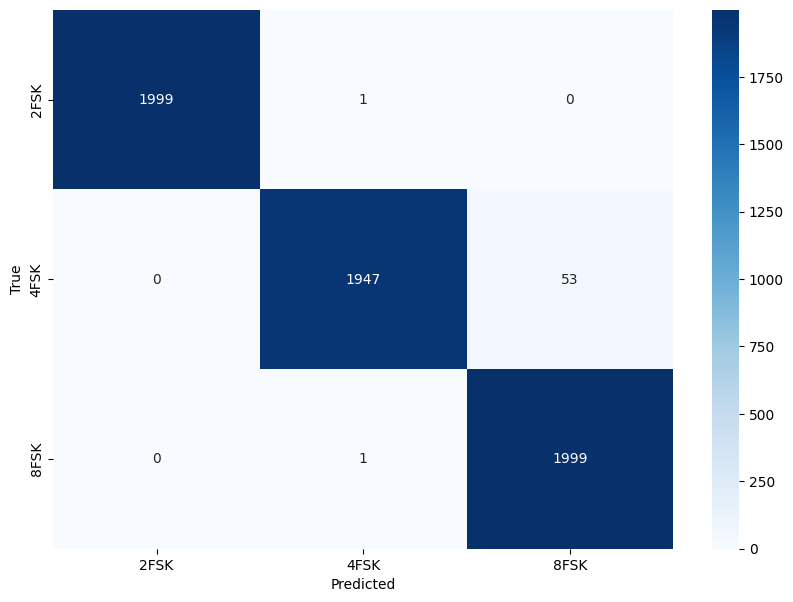

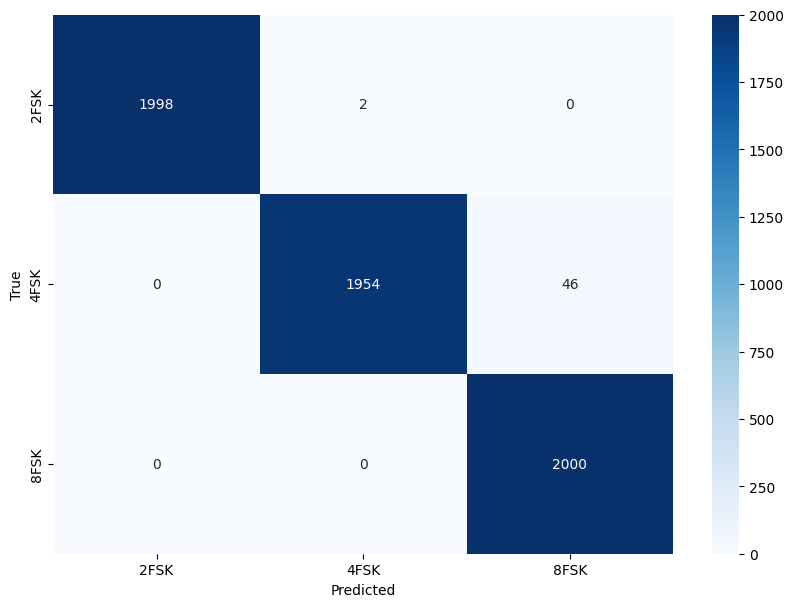

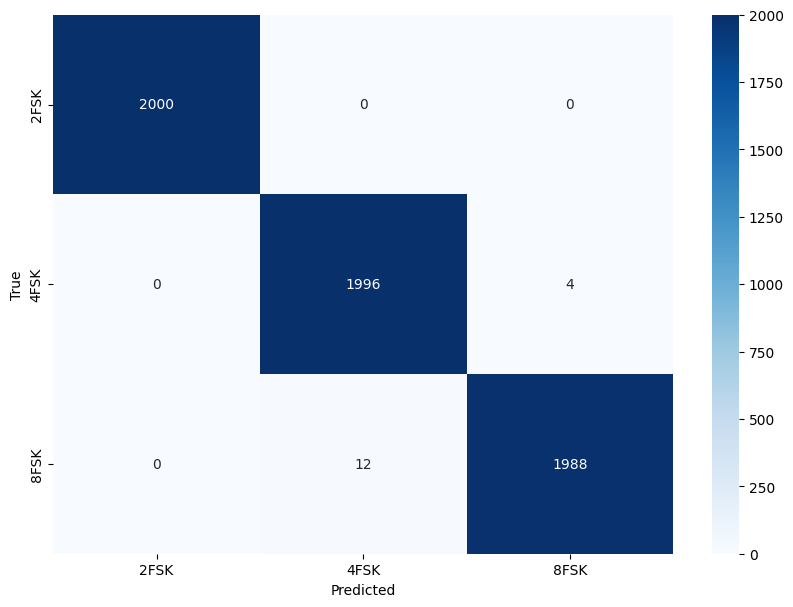

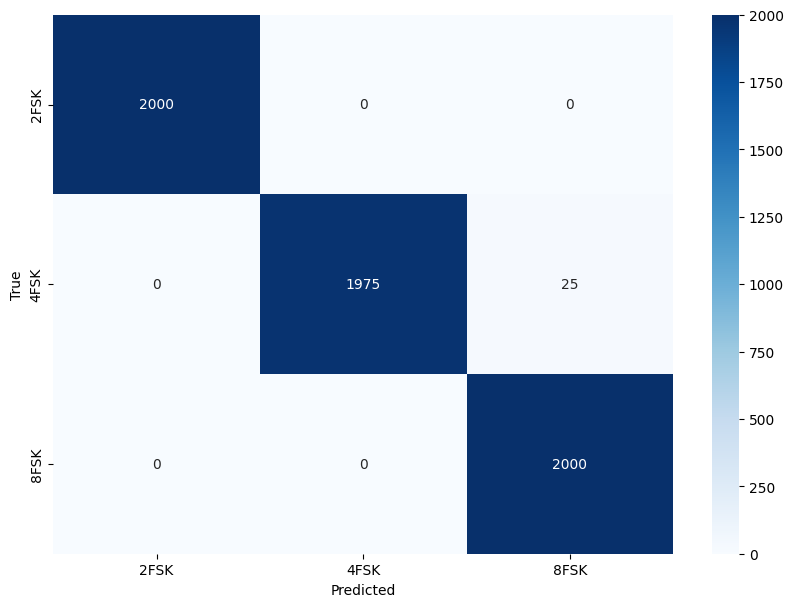

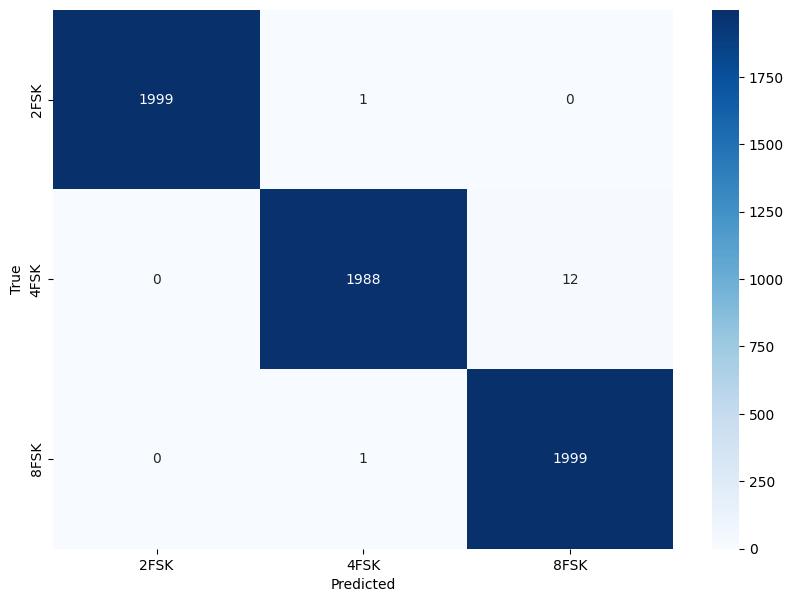

In [ ]:
import seaborn as sns
classes = label_encoder.classes_

# Print confusion matrices and classification reports for each fold
for i, (cm, report) in enumerate(zip(cms, reports)):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

The cross validation of the model yielded interesting results. From the classification reports and confusion matrices, it can be seen that there still remain some errors in classification among the samples.

What can be seen is that most of the confusion is between 4FSK and 8FSK. While this could be due to the similarity between them in features, there is another possibility. The few errors may have more likely occured due to higher noise. In previous attempts at AMR, perfect results had been yielded when the samples were of higher SNR. In the previous attempts, the lowest SNR used was 10dB. Here the lowest values are at -2dB and 0dB. This could indicate that what brought forth imperfection here was not the striking similarity between 4FSK and 8FSK, but the higher noise. This is even further evident by the high success rate that still remains.

The nature of the error described above in fact does not cause any major inconvenience. The reason being is that, for higher SNRs, BFSK is going to be selected anyways, and since that is the case, the errors will be negligible as all of the errors are between 4FSK and 8FSK.

Taking the above results into consideration, the model is recreated below and trained off of the whole dataset.

In [ ]:
model = create_model((scaled_features.shape[1], 1))
model.fit(scaled_features, integer_labels, epochs=10, batch_size=32)
model.save('/content/drive/MyDrive/Models/AMRProjectModel.h5')
model.save('/content/drive/MyDrive/Models/AMRProjectModel.keras')
from joblib import dump
dump(label_encoder, '/content/drive/MyDrive/Models/AMRProjectLabelEncoder.joblib')
dump(scaler, '/content/drive/MyDrive/Models/AMRProjectScaler.joblib')

Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.2238 - accuracy: 0.8915
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0583 - accuracy: 0.9788
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0487 - accuracy: 0.9818
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0319 - accuracy: 0.9884
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0282 - accuracy: 0.9887
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0201 - accuracy: 0.9930
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0153 - accuracy: 0.9938
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0129 - accuracy: 0.9953
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0095 - accuracy: 0.9966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/MyDrive/Models/AMRProjectScaler.joblib']